<a href="https://colab.research.google.com/github/Abdullah-Tanweer/DEVELOPERS-HUB-AI-INTERNSHIP/blob/main/TASK_2_INTERNSHIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2: Predict Future Stock Prices (Short-Term)
Objective:
Use historical stock data to predict the next day's closing price.
Dataset:
Stock market data from Yahoo Finance (retrieved using the yfinance Python library)
Instructions:
● Select a stock (e.g., Apple, Tesla).
● Load historical data using the yfinance library.
● Use features like Open, High, Low, and Volume to predict the next Close price.
● Train a Linear Regression or Random Forest model.
● Plot actual vs predicted closing prices for comparison.


/tmp/ipython-input-872028341.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2023-01-01', end='2025-08-01')
[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 25.51
R2 Score: 0.89


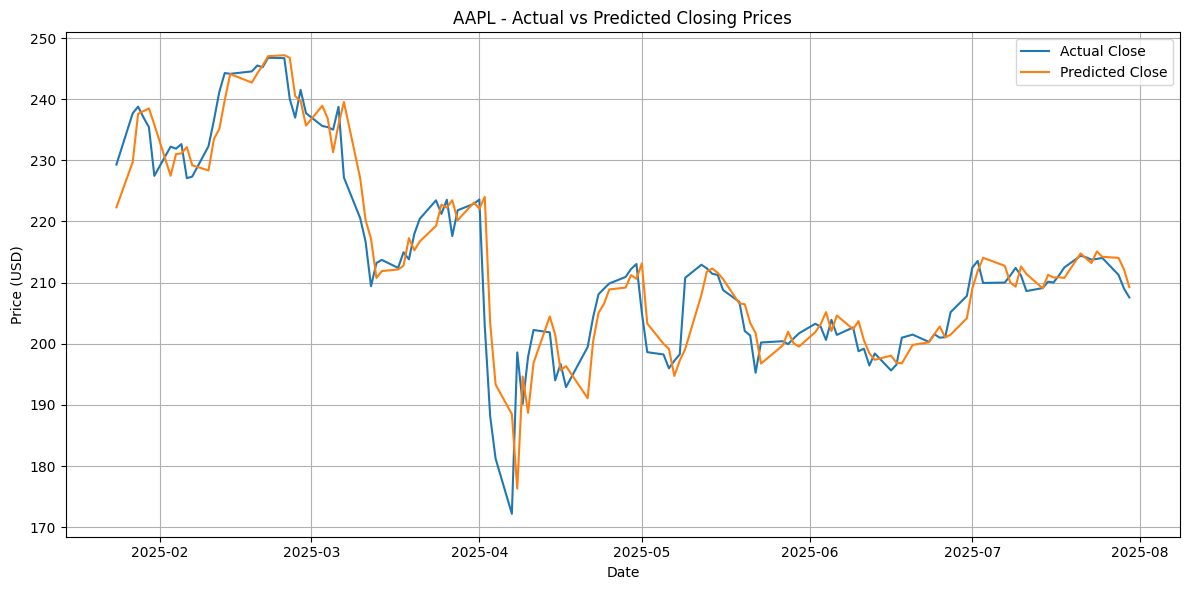

In [1]:
# Step 1: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Historical Stock Data
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2023-01-01', end='2025-08-01')

# Step 3: Prepare Features and Labels
data['Next_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Next_Close']

# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Step 7: Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual Close')
plt.plot(y_test.index, y_pred, label='Predicted Close')
plt.title(f'{stock_symbol} - Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
